# TAGGING DI GETTI E RELATIVI PARTONI CON STRATEGIE BASE

# PROBLEMI

Sembrerebbe che se effettuiamo la prima selezione per creare la coppia di getti/partoni con massa invariante più vicina a quella della W allora abbiammo delle buone associazioni per quanto riguarda selezioni su getti e partoni. Se tuttavia effettuiamo la prima selezione con un altro criterio (ad esempio max deltaeta oppure coppia con massa invariante più grande) allora la seguente coppia creata secondo massa invariante + vicina alla W avremo che l'istogramma degli eventi "good" contiene pochissimi eventi mentre sono quasi tutti classificati come "bad" ovvero il risultato dell'associazione partone-getto è negativa (selezionato il getto non si ha corrispondenza con il suo partone con questo algoritmo)

Algoritmi di selezione combinati per differenziare i getti provenienti dallo scattering dei partoni originari e da decadimento del bosone W. Ci sono 4 metodi base per differenziare i getti. Si fa poi un confronto se i getti selezionati corrispondono ai corrispondenti partoni. Se ciò è verificato allora l'algoritmo funziona bene e si riempie un istogramma. Se l'algoritmo funziona male allora si riempie un secondo istogramma. Da questi due oggetti si può ricavare l'efficienza dell'algoritmo. Ricorda: le informazioni sui partoni sono puramente simulate perchè per congettura di confinamento non osserviamo mai quark in stato libero.

In [1]:
import ROOT as r
import sys
from VBSAnalysis.EventIterator import EventIterator
from VBSAnalysis.Utils import JetSelectors as jsel
from VBSAnalysis import JetTagging 

Welcome to JupyROOT 6.14/00


In [2]:
f = r.TFile("data/ewk_giacomo.root")

In [3]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    #("n_events", 2000)
]

##  TAGGING mjj_mw
questo metodo applica prima una selezione per trovare i getti con massa invariante massima e crea una prima coppia. Dai getti rimanenti seleziona la coppia con massa invariante più vicina agli 80 Gev della W. Plottiamo sia il risultato della prima selezione che quella della seconda (che è quella che ci interessa)

In [23]:
#definisco uno stack per le associazioni getti partoni con strategia mjj mw (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massa
#invariante più vicina a 80 Gev) questo stack è per l'associazione getti-partoni con 80 Gev
hs_mjj_mw = r.THStack("hs_mjj_mw","Mjj W jet");
h_mjj_mw = r.TH1F("mjj_good", "Mw good ", 60, 20, 300 )
h_mjj_mw.SetLineColor(r.kRed)
h_mjj_mw.SetFillColor(r.kRed)
h_mjj_mw.SetFillStyle(3004)
hs_mjj_mw.Add(h_mjj_mw)
h_mjj_mw_bad = r.TH1F("mjj_bad ", "Mw bad ", 60, 20, 300 )
h_mjj_mw_bad.SetLineColor(r.kBlue)
h_mjj_mw_bad.SetFillColor(r.kBlue)
h_mjj_mw_bad.SetFillStyle(3005)
hs_mjj_mw.Add(h_mjj_mw_bad)

In [24]:
#definisco uno stack per le associazioni getti partoni con strategia mjj mw (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massa
#invariante più vicina a 80 Gev) questo stack è per l'associazione getti-partoni con 
#massa invariante + grande
hs_mjj_mw_max = r.THStack("hs_mjj_mw","Mjj maxM jet");
h_mjj_mw_max = r.TH1F("mjj_max_good", "Mjj massima good ", 60, 20, 3000 )
h_mjj_mw_max.SetLineColor(r.kRed)
h_mjj_mw_max.SetFillColor(r.kRed)
h_mjj_mw_max.SetFillStyle(3004)
hs_mjj_mw_max.Add(h_mjj_mw_max)
h_mjj_mw_max_bad = r.TH1F("mjj_max_bad ", "Mjj massima bad ", 60, 20, 3000 )
h_mjj_mw_max_bad.SetLineColor(r.kBlue)
h_mjj_mw_max_bad.SetFillColor(r.kBlue)
h_mjj_mw_max_bad.SetFillStyle(3005)
hs_mjj_mw_max.Add(h_mjj_mw_max_bad)

In [25]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_mjj_mw(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_mw(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, [evento.jets[i] for i in jets_pair1.vbs_pair])
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, [evento.jets[i] for i in jets_pair1.w_pair])
    if associazione:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mjj_mw_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mjj_mw_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_mjj_mw.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_mjj_mw_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1
    
print(cwrt)
print(cwrg)
    
    

392333
964101


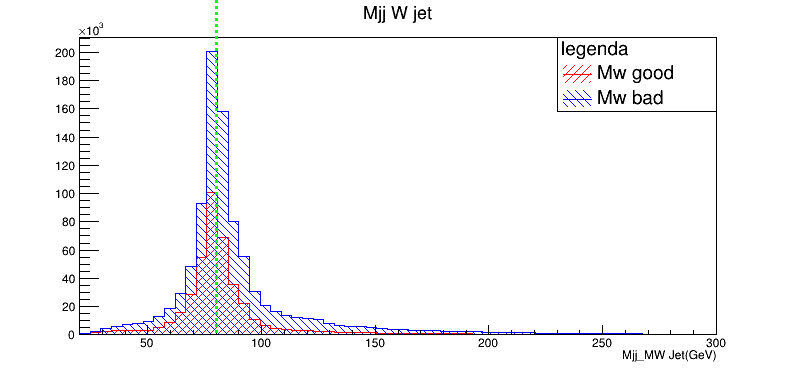

In [26]:
c1 = r.TCanvas ("c1", "canvas", 50, 50, 800, 400)
hs_mjj_mw.Draw("nostack hist")
hs_mjj_mw.GetXaxis().SetTitle("Mjj_MW Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw)
legend.AddEntry(h_mjj_mw_bad)
l = r.TLine(80,0,80,310000)
l.SetLineColor(r.kGreen)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
c1.Draw()
legend.Draw()

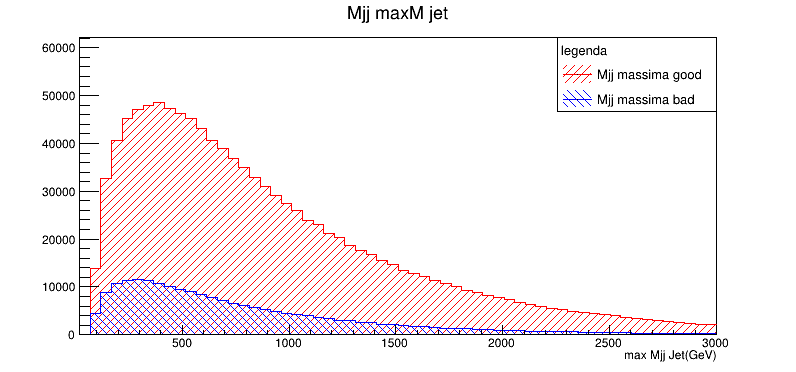

In [27]:
c2 = r.TCanvas("c2", "canvas", 50, 50, 800, 400)
hs_mjj_mw_max.Draw("no stack hist")
hs_mjj_mw_max.GetXaxis().SetTitle("max Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw_max)
legend.AddEntry(h_mjj_mw_max_bad)
legend.Draw()
c2.Draw()


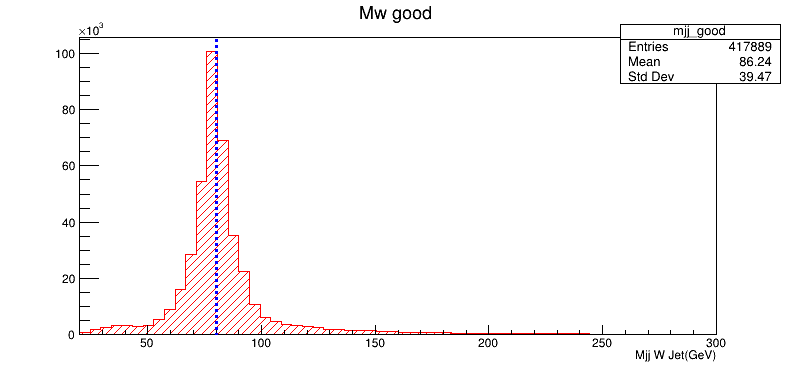

In [28]:
c3 = r.TCanvas("c3", "canvas", 50, 50, 800, 400)
h_mjj_mw.Draw("hist")
h_mjj_mw.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw)
l = r.TLine(80,0,80,105000)
l.SetLineColor(r.kBlue)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
uno = h_mjj_mw.GetEntries()
c3.Draw()

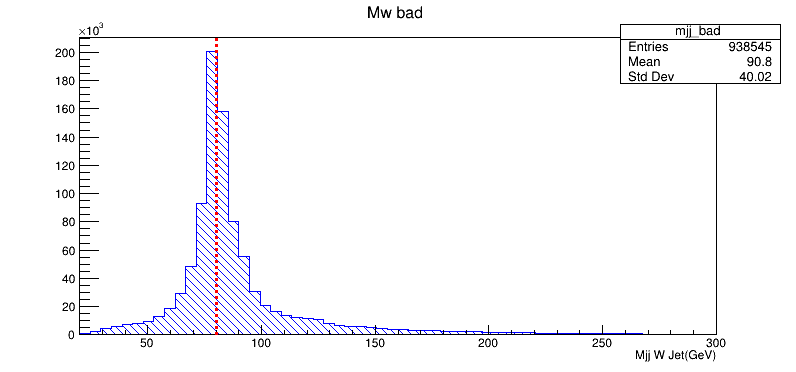

In [29]:
c4 = r.TCanvas("c4", "canvas", 50, 50, 800, 400)
h_mjj_mw_bad.Draw("hist")
h_mjj_mw_bad.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw_bad)
l = r.TLine(80,0,80,210000)
l.SetLineColor(r.kRed)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
due = h_mjj_mw_bad.GetEntries()
c4.Draw()

In [30]:
print('Efficiency of the algorithm')
print(cwrt/cwrg)

Efficiency of the algorithm
0.40694180381516043


#  TAGGING mw_mjj
questo metodo applica prima una selezione per trovare i getti con massa invariante più vicina a quella della W e crea una prima coppia. Dai getti rimanenti seleziona la coppia con massa invariante più grande. Plottiamo sia il risultato della prima selezione (che è quella che ci interessa) che quella della seconda 

In [31]:
#definisco uno stack per le associazioni getti partoni con strategia mjj mw (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massa
#invariante più vicina a 80 Gev) questo stack è per l'associazione getti-partoni con 80 Gev
hs_mjj_mw = r.THStack("hs_mjj_mw","Mw jet");
h_mjj_mw = r.TH1F("mw_good", "Mw good ", 60, 20, 150 )
h_mjj_mw.SetLineColor(r.kRed)
h_mjj_mw.SetFillColor(r.kRed)
h_mjj_mw.SetFillStyle(3004)
hs_mjj_mw.Add(h_mjj_mw)
h_mjj_mw_bad = r.TH1F("mw_bad ", "Mw bad ", 60, 20, 150 )
h_mjj_mw_bad.SetLineColor(r.kBlue)
h_mjj_mw_bad.SetFillColor(r.kBlue)
h_mjj_mw_bad.SetFillStyle(3005)
hs_mjj_mw.Add(h_mjj_mw_bad)

In [32]:
#definisco uno stack per le associazioni getti partoni con strategia mjj mw (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massa
#invariante più vicina a 80 Gev) questo stack è per l'associazione getti-partoni con 
#massa invariante + grande
hs_mjj_mw_max = r.THStack("hs_mjj_mw","Max M jets");
h_mjj_mw_max = r.TH1F("mjj_max_good", "Mjj massima good ", 60, 20, 3000 )
h_mjj_mw_max.SetLineColor(r.kRed)
h_mjj_mw_max.SetFillColor(r.kRed)
h_mjj_mw_max.SetFillStyle(3004)
hs_mjj_mw_max.Add(h_mjj_mw_max)
h_mjj_mw_max_bad = r.TH1F("mjj_max_bad ", "Mjj massima bad ", 60, 20, 3000 )
h_mjj_mw_max_bad.SetLineColor(r.kBlue)
h_mjj_mw_max_bad.SetFillColor(r.kBlue)
h_mjj_mw_max_bad.SetFillStyle(3005)
hs_mjj_mw_max.Add(h_mjj_mw_max_bad)

In [33]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_mw_mjj(evento.partons)
    jets_pair1 = JetTagging.strategy_mw_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, [evento.jets[i] for i in jets_pair1.vbs_pair])
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, [evento.jets[i] for i in jets_pair1.w_pair])
    if associazione:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mjj_mw_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mjj_mw_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_mjj_mw.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_mjj_mw_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1
    
print(cwrt)
print(cwrg)

421815
934619


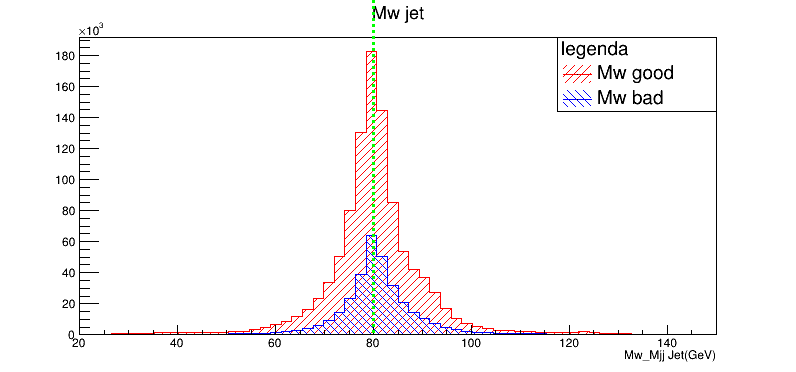

In [34]:
c1 = r.TCanvas ("c1", "canvas", 50, 50, 800, 400)
hs_mjj_mw.Draw("nostack hist")
hs_mjj_mw.GetXaxis().SetTitle("Mw_Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw)
legend.AddEntry(h_mjj_mw_bad)
l = r.TLine(80,0,80,255000)
l.SetLineColor(r.kGreen)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
c1.Draw()
legend.Draw()

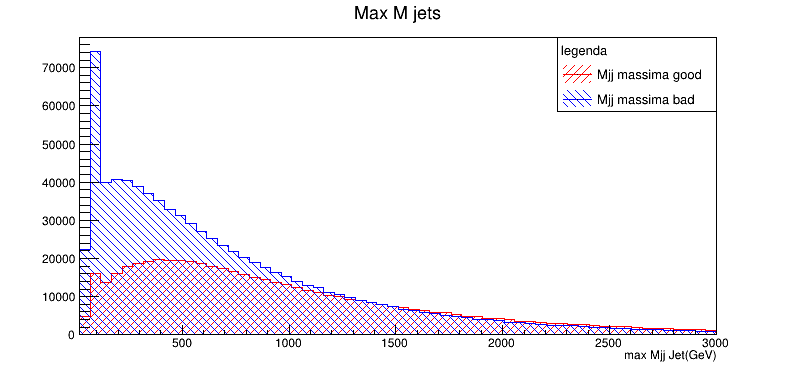

In [35]:
c2 = r.TCanvas("c2", "canvas", 50, 50, 800, 400)
hs_mjj_mw_max.Draw("nostack hist")
hs_mjj_mw_max.GetXaxis().SetTitle("max Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw_max)
legend.AddEntry(h_mjj_mw_max_bad)
legend.Draw()
c2.Draw()

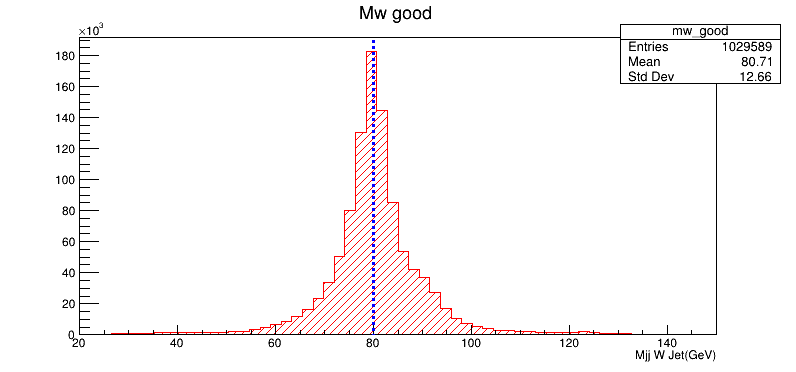

In [36]:
c3 = r.TCanvas("c3", "canvas", 50, 50, 800, 400)
h_mjj_mw.Draw("hist")
h_mjj_mw.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw)
l = r.TLine(80,0,80,190000)
l.SetLineColor(r.kBlue)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
c3.Draw()

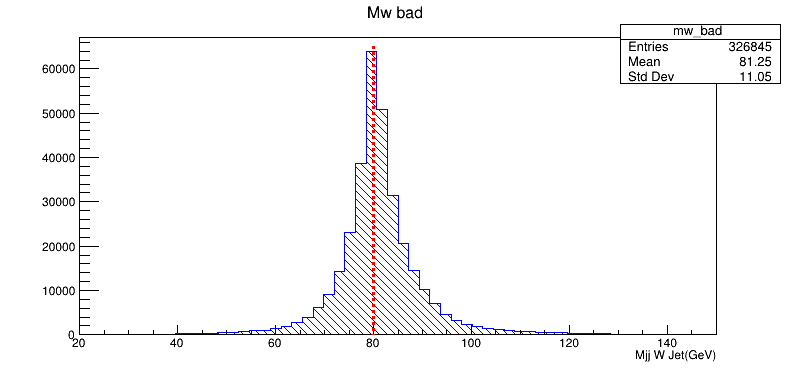

In [37]:
c4 = r.TCanvas("c4", "canvas", 50, 50, 800, 400)
h_mjj_mw_bad.Draw("hist")
h_mjj_mw_bad.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw_bad)
l = r.TLine(80,0,80,65000)
l.SetLineColor(r.kRed)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
c4.Draw()

In [38]:
print('Efficiency of the algorithm')
print(cwrt/cwrg)

Efficiency of the algorithm
0.451322945499717


# TAGGING mw_deltaeta
questo metodo applica prima una selezione per trovare i getti con massa invariante più vicina a quella della W e crea una prima coppia. Dai getti rimanenti seleziona la coppia con deltaeta  più grande. Plottiamo sia il risultato della prima selezione (che è quella che ci interessa) che quella della seconda 

In [39]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con 80 Gev
hs_mw_deltaeta = r.THStack("hs_mjj_mw","Mw jet");
h_mw_deltaeta = r.TH1F("mw_good", "Mw good ", 60, 20, 150 )
h_mw_deltaeta.SetLineColor(r.kRed)
h_mw_deltaeta.SetFillColor(r.kRed)
h_mw_deltaeta.SetFillStyle(3004)
hs_mw_deltaeta.Add(h_mw_deltaeta)
h_mw_deltaeta_bad = r.TH1F("mw_bad ", "Mw bad ", 60, 20, 150 )
h_mw_deltaeta_bad.SetLineColor(r.kBlue)
h_mw_deltaeta_bad.SetFillColor(r.kBlue)
h_mw_deltaeta_bad.SetFillStyle(3005)
hs_mw_deltaeta.Add(h_mw_deltaeta_bad)

In [40]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_mw_deltaeta_max = r.THStack("hs_mw_deltaeta_max","Max deltaeta jets");
h_mw_deltaeta_max = r.TH1F("deltaeta_max_good", "deltaeta massima good ", 60, 20, 3000 )
h_mw_deltaeta_max.SetLineColor(r.kRed)
h_mw_deltaeta_max.SetFillColor(r.kRed)
h_mw_deltaeta_max.SetFillStyle(3004)
hs_mw_deltaeta_max.Add(h_mw_deltaeta_max)
h_mw_deltaeta_max_bad = r.TH1F("deltaeta_max_bad ", "deltaeta massima bad ", 60, 20, 3000 )
h_mw_deltaeta_max_bad.SetLineColor(r.kBlue)
h_mw_deltaeta_max_bad.SetFillColor(r.kBlue)
h_mw_deltaeta_max_bad.SetFillStyle(3005)
hs_mw_deltaeta_max.Add(h_mw_deltaeta_max_bad)

In [41]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_mw_deltaeta(evento.partons)
    jets_pair1 = JetTagging.strategy_mw_deltaeta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, [evento.jets[i] for i in jets_pair1.vbs_pair])
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, [evento.jets[i] for i in jets_pair1.w_pair])
    if associazione:
        #due getti con deltaeta più grande indici corrispondono a partoni
        h_mw_deltaeta_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con deltaeta più grande indici NON corrispondono a partoni
        h_mw_deltaeta_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_mw_deltaeta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_mw_deltaeta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1
    
print(cwrt)
print(cwrg)

364045
992389


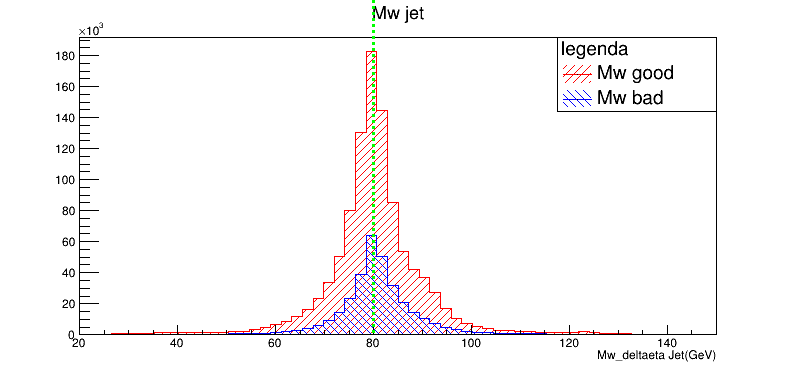

In [42]:
cn = r.TCanvas ("c1", "canvas", 50, 50, 800, 400)
hs_mw_deltaeta.Draw("nostack hist")
hs_mw_deltaeta.GetXaxis().SetTitle("Mw_deltaeta Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mw_deltaeta)
legend.AddEntry(h_mw_deltaeta_bad)
l = r.TLine(80,0,80,255000)
l.SetLineColor(r.kGreen)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
cn.Draw()
legend.Draw()

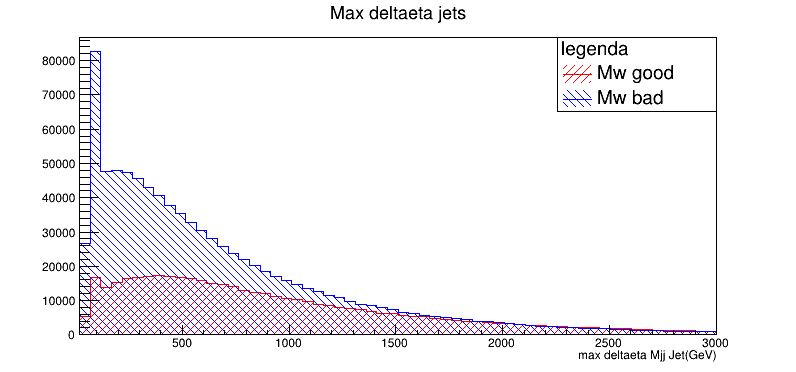

In [43]:
c2 = r.TCanvas("c2", "canvas", 50, 50, 800, 400)
hs_mw_deltaeta_max.Draw("nostack hist")
hs_mw_deltaeta_max.GetXaxis().SetTitle("max deltaeta Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mw_deltaeta)
legend.AddEntry(h_mw_deltaeta_bad)
legend.Draw()
c2.Draw()

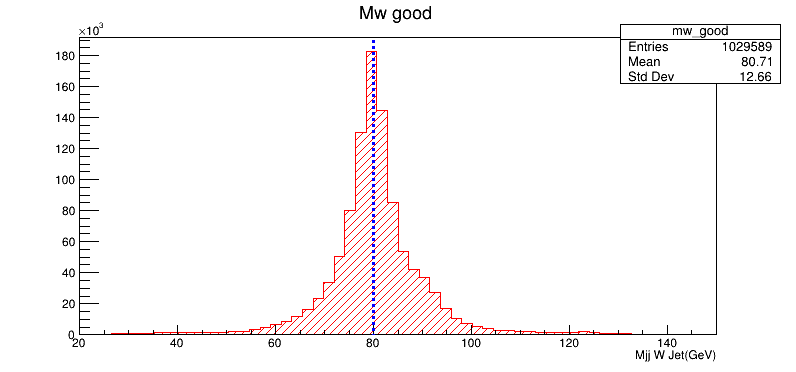

In [44]:
c3= r.TCanvas("c3", "canvas", 50, 50, 800, 400)
h_mw_deltaeta.Draw("hist")
h_mw_deltaeta.GetXaxis().SetTitle("Mjj W Jet(GeV)")
l = r.TLine(80,0,80,190000)
l.SetLineColor(r.kBlue)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
c3.Draw()

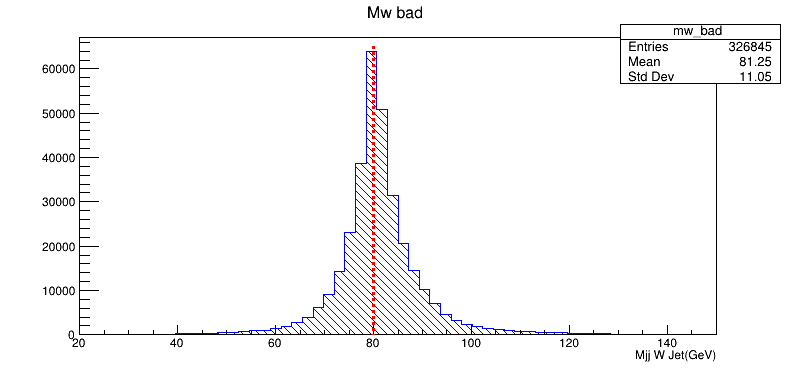

In [45]:
c4 = r.TCanvas("c4", "canvas", 50, 50, 800, 400)
h_mw_deltaeta_bad.Draw("hist")
h_mw_deltaeta_bad.GetXaxis().SetTitle("Mjj W Jet(GeV)")
l = r.TLine(80,0,80,65000)
l.SetLineColor(r.kRed)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
c4.Draw()

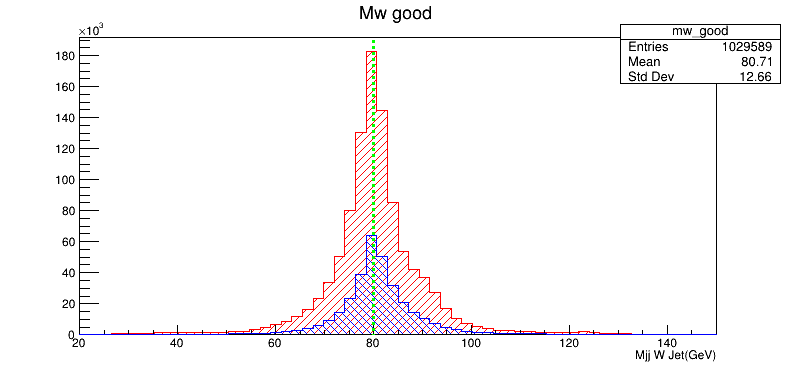

In [46]:
c20 = r.TCanvas("c20", "canvas", 50, 50, 800, 400)
h_mw_deltaeta.Draw("hist")
h_mw_deltaeta_bad.Draw("samehist")
h_mw_deltaeta_bad.GetXaxis().SetTitle("Mjj W Jet(GeV)")
l = r.TLine(80,0,80,190000)
l.SetLineColor(r.kGreen)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
c20.Draw()

In [47]:
print('Efficiency of the algorithm')
print(cwrt/cwrg)

Efficiency of the algorithm
0.36683699637944395


# TAGGING deltaeta_mw
questo metodo applica prima una selezione per trovare i getti con deltaeta  più grande e crea una prima coppia. Dai getti rimanenti seleziona la coppia con massa invariante più vicina a quella della W. Plottiamo sia il risultato della prima selezione che quella della seconda  (che è quella che ci interessa).

In [48]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con 80 Gev
hs_deltaeta_mw = r.THStack("hs_deltaeta_mw","Mw jet");
h_deltaeta_mw = r.TH1F("mw_good", "Mw good ", 60, 20, 150 )
h_deltaeta_mw.SetLineColor(r.kRed)
h_deltaeta_mw.SetFillColor(r.kRed)
h_deltaeta_mw.SetFillStyle(3004)
hs_deltaeta_mw.Add(h_deltaeta_mw)
h_deltaeta_mw_bad = r.TH1F("mw_bad ", "Mw bad ", 60, 20, 150 )
h_deltaeta_mw_bad.SetLineColor(r.kBlue)
h_deltaeta_mw_bad.SetFillColor(r.kBlue)
h_deltaeta_mw_bad.SetFillStyle(3005)
hs_deltaeta_mw.Add(h_deltaeta_mw_bad)

In [49]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_deltaeta_mw_max = r.THStack("hs_mw_deltaeta_max","Max deltaeta jets");

h_deltaeta_mw_max_bad = r.TH1F("deltaeta_maxx_bad ", "deltaeta massima bad ", 60, 20, 3000 )
h_deltaeta_mw_max_bad.SetLineColor(r.kBlue)
h_deltaeta_mw_max_bad.SetFillColor(r.kBlue)
h_deltaeta_mw_max_bad.SetFillStyle(3005)
hs_deltaeta_mw_max.Add(h_deltaeta_mw_max_bad)

h_deltaeta_mw_max = r.TH1F("deltaeta_maxx_good", "deltaeta massima good ", 60, 20, 3000 )
h_deltaeta_mw_max.SetLineColor(r.kRed)
h_deltaeta_mw_max.SetFillColor(r.kRed)
h_deltaeta_mw_max.SetFillStyle(3004)
hs_deltaeta_mw_max.Add(h_deltaeta_mw_max)

In [50]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_deltaeta_mw(evento.partons)
    jets_pair1 = JetTagging.strategy_deltaeta_mw(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, [evento.jets[i] for i in jets_pair1.vbs_pair])
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, [evento.jets[i] for i in jets_pair1.w_pair])
    if associazione:
        #due getti con deltaeta più grande indici corrispondono a partoni
        h_deltaeta_mw_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con deltaeta più grande indici NON corrispondono a partoni
        h_deltaeta_mw_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_deltaeta_mw.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_deltaeta_mw_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1
    
print(cwrt)
print(cwrg)

348743
1007691


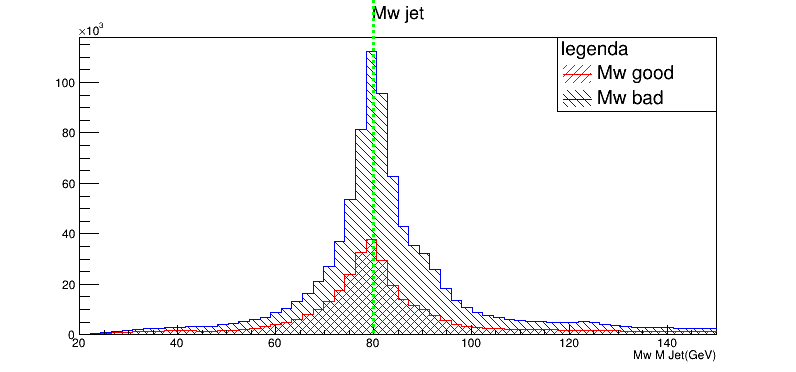

In [51]:
cm = r.TCanvas ("c1", "canvas", 50, 50, 800, 400)
hs_deltaeta_mw.Draw("nostack hist")
hs_deltaeta_mw.GetXaxis().SetTitle("Mw M Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_deltaeta_mw)
legend.AddEntry(h_deltaeta_mw_bad)
l = r.TLine(80,0,80,155000)
l.SetLineColor(r.kGreen)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
cm.Draw()
legend.Draw()


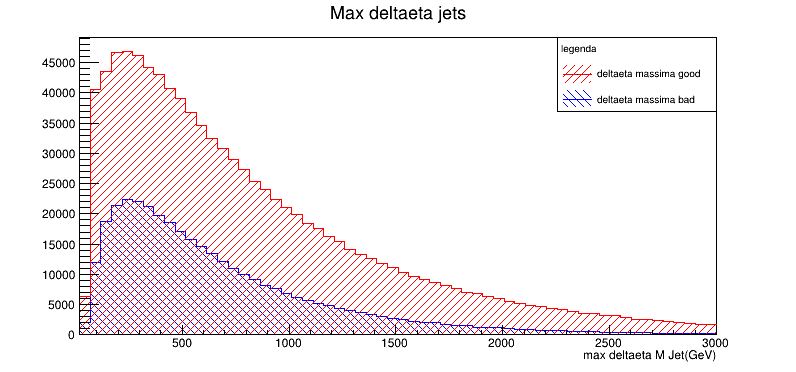

In [52]:
c2 = r.TCanvas("c2", "canvas", 50, 50, 800, 400)
hs_deltaeta_mw_max.Draw("nostack hist")
hs_deltaeta_mw_max.GetXaxis().SetTitle("max deltaeta M Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_deltaeta_mw_max)
legend.AddEntry(h_deltaeta_mw_max_bad)
legend.Draw()
c2.Draw()


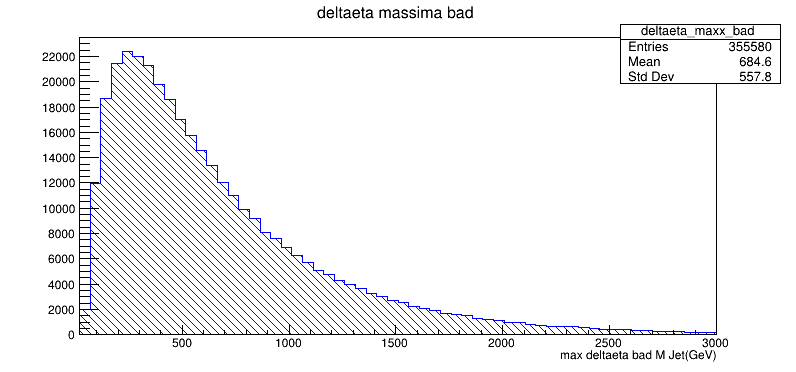

In [53]:
cz = r.TCanvas("cz", "canvas", 50, 50, 800, 400)
h_deltaeta_mw_max_bad.Draw("hist")
h_deltaeta_mw_max_bad.GetXaxis().SetTitle("max deltaeta bad M Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_deltaeta_mw_max)
legend.AddEntry(h_deltaeta_mw_max_bad)
cz.Draw()

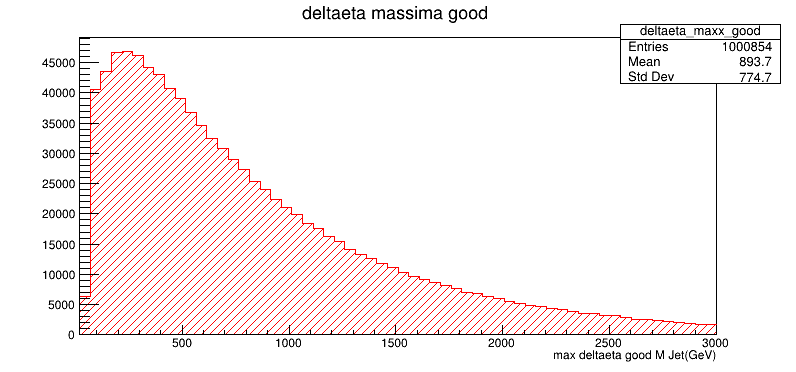

In [54]:
cf = r.TCanvas("cf", "canvas", 50, 50, 800, 400)
h_deltaeta_mw_max.Draw("hist")
h_deltaeta_mw_max.GetXaxis().SetTitle("max deltaeta good M Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_deltaeta_mw_max)
legend.AddEntry(h_deltaeta_mw_max_bad)
cf.Draw()

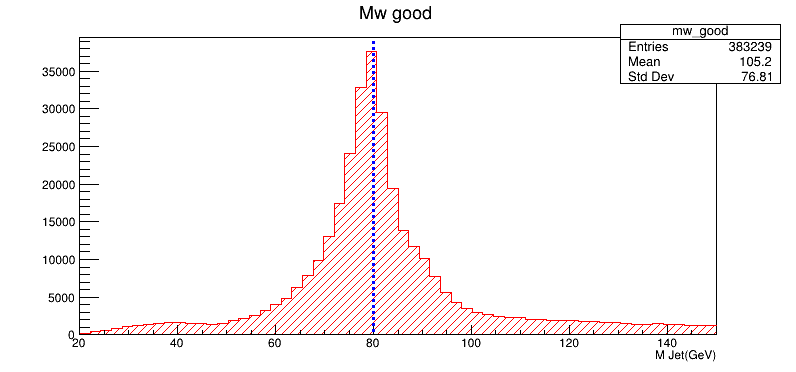

In [55]:
c3= r.TCanvas("c3", "canvas", 50, 50, 800, 400)
h_deltaeta_mw.Draw("hist")
h_deltaeta_mw.GetXaxis().SetTitle("M Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
l = r.TLine(80,0,80,39000)
l.SetLineColor(r.kBlue)
l.SetLineWidth(3)
l.SetLineStyle(2)
c3.Draw()
l.Draw()

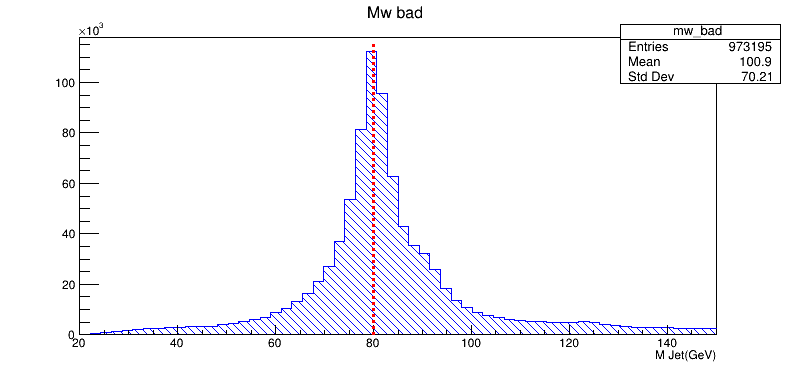

In [56]:
c4 = r.TCanvas("c4", "canvas", 50, 50, 800, 400)
h_deltaeta_mw_bad.Draw("hist")
h_deltaeta_mw_bad.GetXaxis().SetTitle("M Jet(GeV)")
l = r.TLine(80,0,80,115000)
l.SetLineColor(r.kRed)
l.SetLineWidth(3)
l.SetLineStyle(2)
l.Draw()
c4.Draw()

In [57]:
print('Efficiency of the algorithm')
print(cwrt/cwrg)

Efficiency of the algorithm
0.3460812888077794


# TAGGING maxpt_mjj 
in quanto i getti più energetici vengono emessi con un piccolo angolo rispetto all'asse di collisione quinfi con poso momento trasverso e grande momento longitudinale.

In [85]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con 80 Gev
hs_maxpt_mjj = r.THStack("hs_maxpt_mjj","Max pt Mjj Jet");
h_maxpt_mjj = r.TH1F("maxpt_good", "Max pt good ", 60, 20, 1000 )
h_maxpt_mjj.SetLineColor(r.kRed)
h_maxpt_mjj.SetFillColor(r.kRed)
h_maxpt_mjj.SetFillStyle(3004)
hs_maxpt_mjj.Add(h_maxpt_mjj)
h_maxpt_mjj_bad = r.TH1F("maxpt_bad ", "Max pt bad ", 60, 20, 1000 )
h_maxpt_mjj_bad.SetLineColor(r.kBlue)
h_maxpt_mjj_bad.SetFillColor(r.kBlue)
h_maxpt_mjj_bad.SetFillStyle(3005)
hs_maxpt_mjj.Add(h_maxpt_mjj_bad)

In [86]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_maxpt_mjj_max = r.THStack("hs_maxpt_Mjj_max","Max Mjj jets");
h_maxpt_mjj_max = r.TH1F("Mjj_max_good", "Mjj massima good ", 60, 20, 3000 )
h_maxpt_mjj_max.SetLineColor(r.kRed)
h_maxpt_mjj_max.SetFillColor(r.kRed)
h_maxpt_mjj_max.SetFillStyle(3004)
hs_maxpt_mjj_max.Add(h_maxpt_mjj_max)
h_maxpt_mjj_max_bad = r.TH1F("mjj_max_bad ", "Mjj massima bad ", 60, 20, 3000 )
h_maxpt_mjj_max_bad.SetLineColor(r.kBlue)
h_maxpt_mjj_max_bad.SetFillColor(r.kBlue)
h_maxpt_mjj_max_bad.SetFillStyle(3005)
hs_maxpt_mjj_max.Add(h_maxpt_mjj_max_bad)

In [87]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_maxpt_mjj(evento.partons)
    jets_pair1 = JetTagging.strategy_maxpt_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, [evento.jets[i] for i in jets_pair1.vbs_pair])
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, [evento.jets[i] for i in jets_pair1.w_pair])
    if associazione:
        #due getti con deltaeta più grande indici corrispondono a partoni
        h_maxpt_mjj_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con deltaeta più grande indici NON corrispondono a partoni
        h_maxpt_mjj_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_maxpt_mjj.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_maxpt_mjj_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1
    
print(cwrt)
print(cwrg)

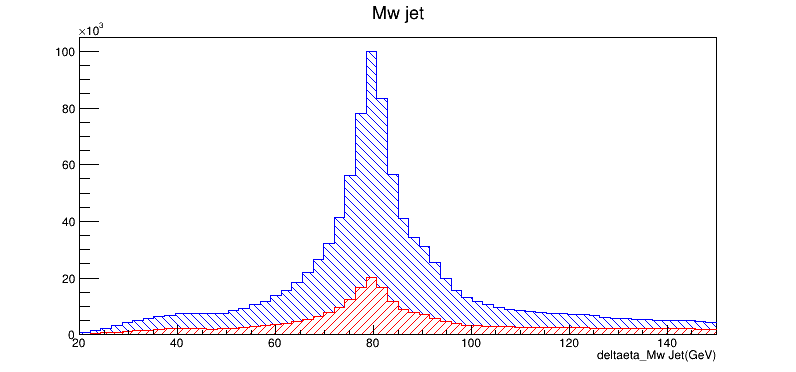

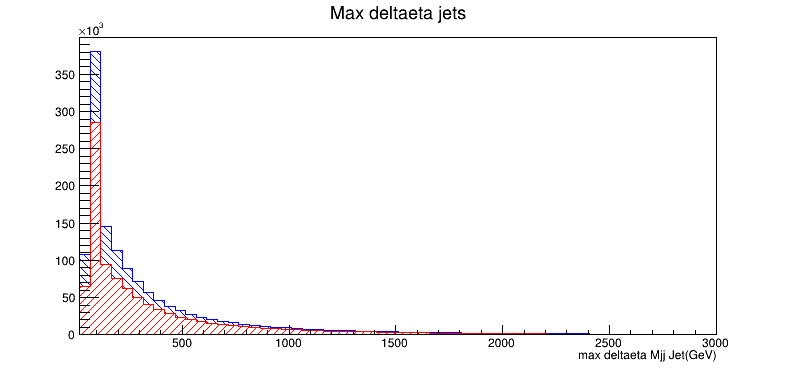

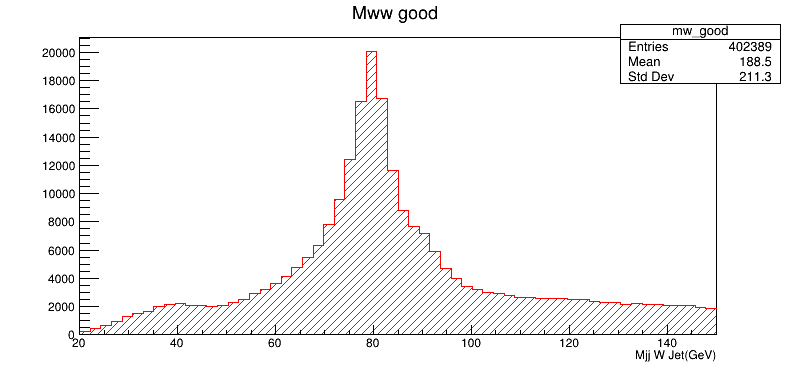

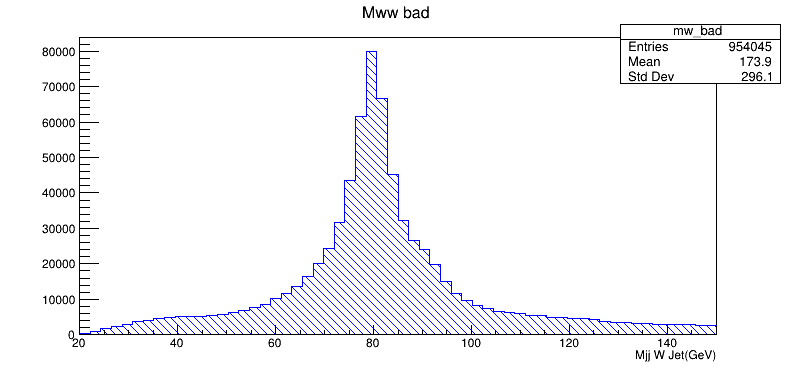

In [88]:
cm = r.TCanvas ("c1", "canvas", 50, 50, 800, 400)
hs_maxpt_mjj.Draw("hist")
hs_maxpt_mjj.GetXaxis().SetTitle("Max Pt Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_maxpt_mjj)
legend.AddEntry(h_maxpt_mjj_bad)
cm.Draw()
legend.Draw()

c2 = r.TCanvas("c2", "canvas", 50, 50, 800, 400)
hs_maxpt_mjj_max.Draw("hist")
hs_maxpt_mjj_max.GetXaxis().SetTitle("max Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_maxpt_mjj)
legend.AddEntry(h_maxpt_mjj_bad)
legend.Draw()
c2.Draw()

c3= r.TCanvas("c3", "canvas", 50, 50, 800, 400)
h_maxpt_mjj.Draw("hist")
h_maxpt_mjj.GetXaxis().SetTitle("Max Pt Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw)
c3.Draw()

c4 = r.TCanvas("c4", "canvas", 50, 50, 800, 400)
h_maxpt_mjj_bad.Draw("hist")
h_maxpt_mjj_bad.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw_bad)
c4.Draw()

# TAGGING mjj_deltaeta
prima coppia selezionata con max mjj seconda coppia selezionata con max deltaeta e vediamo che succede

In [81]:
#in teoria questi sarebbero i getti da bosone W
hs_mjj_eta = r.THStack("hs_mjj_deltaeta","max deltaeta jet");
h_mjj_eta = r.TH1F("max deltaeta_good", "Max deltaeta good ", 60, 20, 150 )
h_mjj_eta.SetLineColor(r.kRed)
h_mjj_eta.SetFillColor(r.kRed)
h_mjj_eta.SetFillStyle(3004)
hs_mjj_eta.Add(h_mjj_eta)
h_mjj_eta_bad = r.TH1F("max deltaeta_bad ", "Max deltaeta bad ", 60, 20, 150 )
h_mjj_eta_bad.SetLineColor(r.kBlue)
h_mjj_eta_bad.SetFillColor(r.kBlue)
h_mjj_eta_bad.SetFillStyle(3005)
hs_mjj_eta.Add(h_mjj_eta_bad)

In [82]:
#questa è la coppia con massa più grande e viene selzionata per prima...
#in teoria è esclusa che questa coppia sia vicina a W
hs_mjj_eta_max = r.THStack("hs_mjj_max","Max mjj jets");
h_mjj_eta_max = r.TH1F("mjj_max_good", "mjj massima good ", 60, 20, 3000 )
h_mjj_eta_max.SetLineColor(r.kRed)
h_mjj_eta_max.SetFillColor(r.kRed)
h_mjj_eta_max.SetFillStyle(3004)
hs_mjj_eta_max.Add(h_mjj_eta_max)
h_mjj_eta_max_bad = r.TH1F("mjj_max_bad ", "mjj massima bad ", 60, 20, 3000 )
h_mjj_eta_max_bad.SetLineColor(r.kBlue)
h_mjj_eta_max_bad.SetFillColor(r.kBlue)
h_mjj_eta_max_bad.SetFillStyle(3005)
hs_mjj_eta_max.Add(h_mjj_eta_max_bad)

In [83]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_mjj_deltaeta(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_deltaeta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con deltaeta più grande indici corrispondono a partoni
        h_mjj_eta_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con deltaeta più grande indici NON corrispondono a partoni
        h_mjj_eta_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_mjj_eta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_mjj_eta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    

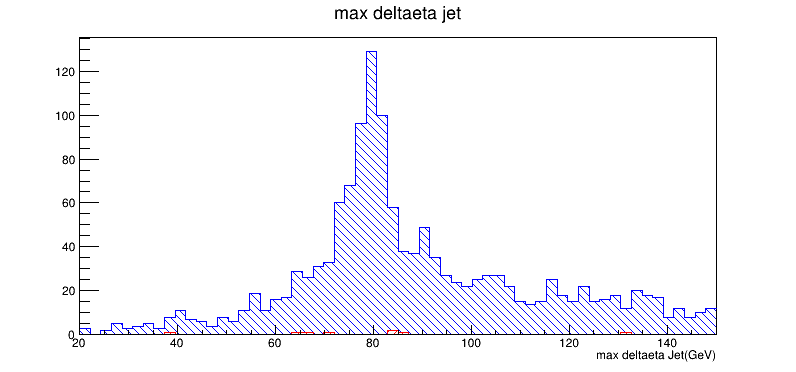

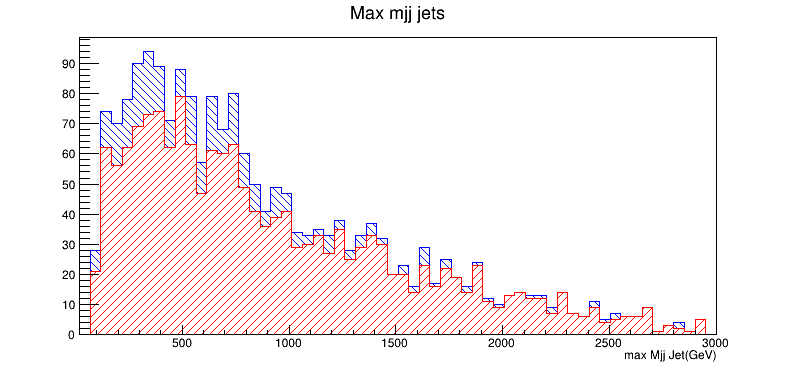

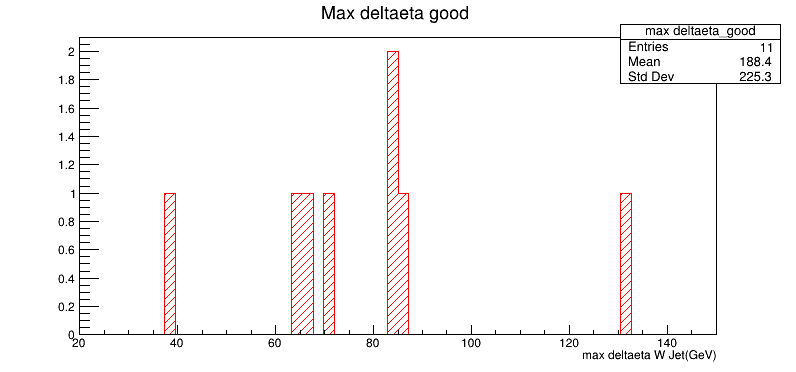

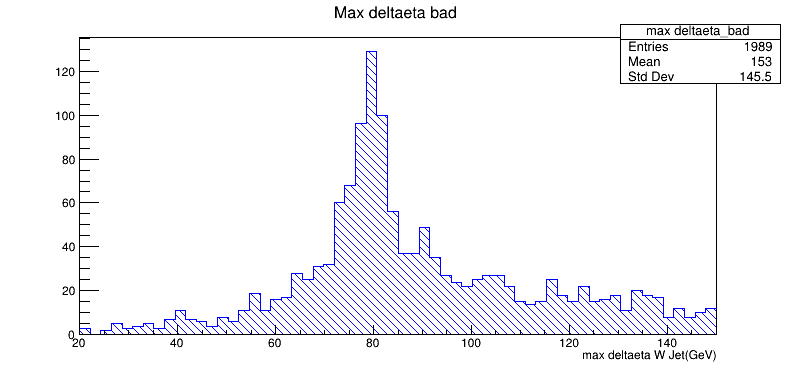

In [84]:
cm = r.TCanvas ("c1", "canvas", 50, 50, 800, 400)
hs_mjj_eta.Draw("hist")
hs_mjj_eta.GetXaxis().SetTitle("max deltaeta Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_eta)
legend.AddEntry(h_mjj_eta_bad)
cm.Draw()
legend.Draw()

c2 = r.TCanvas("c2", "canvas", 50, 50, 800, 400)
hs_mjj_eta_max.Draw("hist")
hs_mjj_eta_max.GetXaxis().SetTitle("max Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_eta_max)
legend.AddEntry(h_mjj_eta_max_bad)
legend.Draw()
c2.Draw()

c3= r.TCanvas("c3", "canvas", 50, 50, 800, 400)
h_mjj_eta.Draw("hist")
h_mjj_eta.GetXaxis().SetTitle("max deltaeta W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_eta)
c3.Draw()

c4 = r.TCanvas("c4", "canvas", 50, 50, 800, 400)
h_mjj_eta_bad.Draw("hist")
h_mjj_eta_bad.GetXaxis().SetTitle("max deltaeta W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_eta_bad)
c4.Draw()